In [18]:
import numpy as np
import pandas as pd

In [19]:
class Perceptron:
    def __init__(self, learning_rate= 0.01, n_iters= 10000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_function = self._unit_step_function
        self.theta = None
        self.bias = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape

        #initialising theta
        self.theta = np.zeros(n_features)
        self.bias = 0

        #making sure y only takes values 1 or 0
        y_ = np.array([1 if i>0 else 0 for i in y])

        for _ in range(self.n_iters):
            for index, x_value in enumerate(X):
                linear_output = (x_value @ self.theta) + self.bias
                y_predicted = self.activation_function(linear_output)

                update = self.lr * (y_[index] - y_predicted)
                self.theta += update * x_value
                self.bias += update
                

    def predict(self, X):
        linear_output = X @ self.theta + self.bias
        y_predicted = self.activation_function(linear_output)
        y_predicted = np.array(y_predicted)
        return y_predicted
    
    def accuracy(self, y_true, y_pred):
        accuracy = (np.sum(y_true == y_pred)) / len(y_true)
        return accuracy

    def _unit_step_function(self, X):
        return np.where(X >= 0, 1, 0)

In [20]:
data = pd.read_csv('dataset_LP_1.txt')

In [21]:
def process(data):
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]
    X = (X-X.mean(axis= 0)) / X.std(axis= 0)

    return X, y

In [22]:
X, y = process(data)

In [23]:
def split_train_test(X, y, split, seed):
    rows = int(X.shape[0] * split)
    indices = np.arange(X.shape[0])
    np.random.seed(seed)
    np.random.shuffle(indices)
    train = indices[:rows]
    test = indices[rows:]

    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]

    return X_train, y_train, X_test, y_test

In [24]:
X_train, y_train, X_test, y_test = split_train_test(X, y, 0.7, 23)
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [25]:
p = Perceptron()
p.fit(X_train, y_train)
predictions = p.predict(X_test)
score = p.accuracy(y_test, predictions)
print(score)

0.9854368932038835


In [26]:
import seaborn as sns
from sklearn import metrics
from matplotlib import pyplot as plt

In [27]:
cm = metrics.confusion_matrix(y_test, predictions)

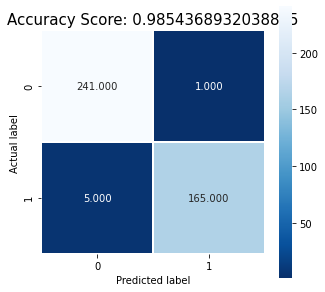

In [28]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)
plt.show()


In [29]:
data2 = pd.read_csv('dataset_LP_2.csv')

In [30]:
X, y = process(data2)

In [31]:
X_train, y_train, X_test, y_test = split_train_test(X, y, 0.7, 23)
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [32]:
p = Perceptron()
p.fit(X_train, y_train)
predictions = p.predict(X_test)
score = p.accuracy(y_test, predictions)
print(score)

0.9966666666666667


In [33]:
cm = metrics.confusion_matrix(y_test, predictions)

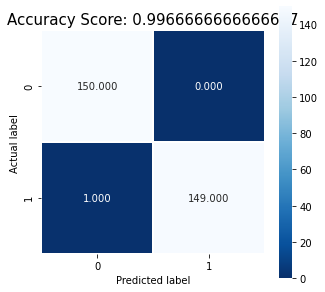

In [34]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)
plt.show()
